In [40]:
mproteina_pesada = 1.028*0.05*250 #densidad 0.28g/ml, 5% en peso , disuelta en 250ml
print(mproteina_pesada)

12.85


,"tiempo, s","volumen Naoh gastado, mL",pH,"tiempo, min","volumen de base gastado ,L","volumen de bureta, mL",DH
0,1,9.5,8.18,0.016667,0.0095,40.5,12.328317
1,2,11.6,8.18,0.033333,0.0116,38.4,15.053524
2,3,13.0,8.18,0.050000,0.0130,37.0,16.870329
3,4,14.0,8.18,0.066667,0.0140,36.0,18.168047
4,5,14.7,8.18,0.083333,0.0147,35.3,19.076449
5,6,15.4,8.18,0.100000,0.0154,34.6,19.984851
6,7,16.1,8.18,0.116667,0.0161,33.9,20.893254
7,8,16.5,8.18,0.133333,0.0165,33.5,21.412341
8,9,16.9,8.18,0.150000,0.0169,33.1,21.931428
9,10,17.4,8.18,0.166667,0.0174,32.6,22.580287


,pendiente,intercepto,r_value,std_err
0,163.512421,9.603110,1.0,0.0
1,109.008281,11.419915,1.0,0.0
2,77.863058,12.977176,1.0,0.0
3,54.504140,14.534437,1.0,0.0
4,54.504140,14.534437,1.0,0.0
5,54.504140,14.534437,1.0,0.0
6,31.145223,17.259644,1.0,0.0
7,31.145223,17.259644,1.0,0.0
8,38.931529,16.091699,1.0,0.0
9,15.572612,19.984851,1.0,0.0


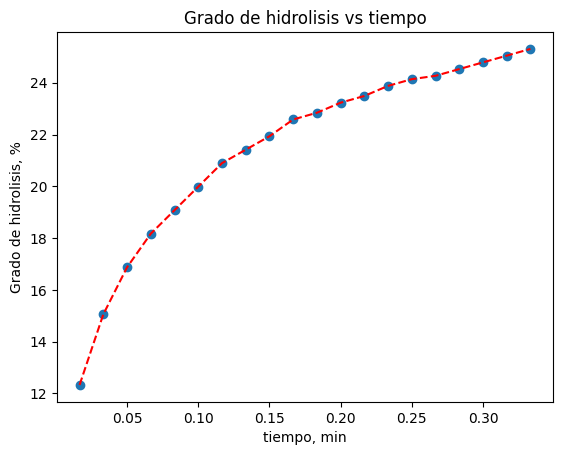

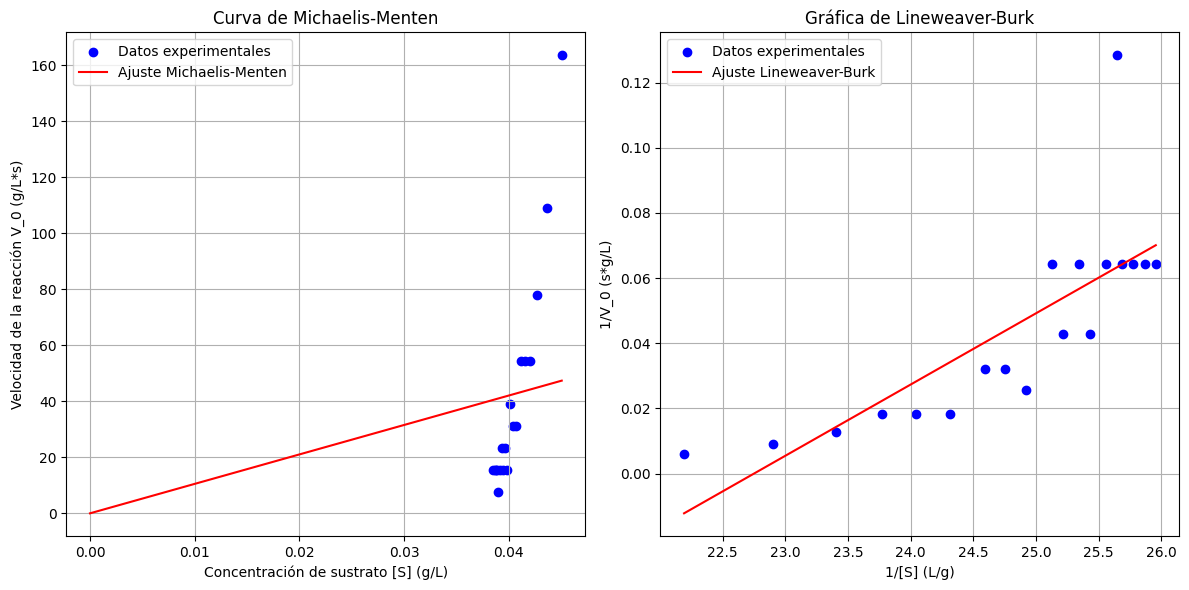

,ajuste,Vmax (g/L*s),Km (g/L)
0,Michaelis-Menten,2.130379e+08,2.027078e+05
1,Lineweaver-Burk,-2.010844e+00,4.657077e+06


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.stats import linregress
from scipy.optimize import curve_fit  # Importar curve_fit

Phi     = 8.18                              # Ph inicial
M_sus   = mproteina_pesada                  #g
C_Naoh  = 1.0                                 # normalidad de la base (determinada por contraste como se indica a continuación)
V_Naoh  = 6.6                               #mL
mp      =  (mproteina_pesada*0.77)/1000     # kg masa de proteína, g (masa pesada • 0,77)
alpha   =  0.885                            # grado de disociación (α = 0,885 para pH = 8 y T = 30-50ºC
h_total =  8.8                              # número de enlaces peptídicos en la proteína (8,8 eq-g/kg)
V_bini  =  50                               # volumen bureta inicial mL
V_mez   =  250                                 # volumen de la mezcla, L
C_0     = M_sus / V_mez

# Datos tomados

Datos = {
    'tiempo, s' : np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]),                       # Lista vacía para el tiempo en segundos
    'volumen Naoh gastado, mL' : np.array([9.5,11.6,13,14,14.7,15.4,16.1,16.5,16.9,17.4,17.6,17.9,18.1,18.4,18.6,18.7,18.9,19.1,19.3,19.5])        # Lista vacía para volumen de NaOH gastado                      
}
Datos['pH'] = np.full(len(Datos['tiempo, s']), 8.18)  # Replicar el valor de pH
Datos['tiempo, min'] = Datos['tiempo, s'] / 60
Datos['volumen de base gastado ,L'] = Datos['volumen Naoh gastado, mL'] / 1000
Datos['volumen de bureta, mL'] = V_bini - Datos['volumen Naoh gastado, mL']
Datos['volumen de base gastado ,L'] = np.array(Datos['volumen de base gastado ,L'])
Datos['DH'] = 100 * (Datos['volumen de base gastado ,L'] * C_Naoh) / (alpha * mp * h_total)

pd_datos = pd.DataFrame(Datos)
display(pd_datos)
# Gráfica
plt.scatter(Datos['tiempo, min'], Datos['DH'])
plt.plot(Datos['tiempo, min'], Datos['DH'], color='red', linestyle='--')
plt.xlabel('tiempo, min')
plt.ylabel('Grado de hidrolisis, %')
plt.title('Grado de hidrolisis vs tiempo')
          
# calculo de pendientes de la gráfica
interceptos = []
r_values = []
pendientes = []
std_errs = []


for i in range(len(Datos['tiempo, min']) - 1):
    # Calcular la pendiente entre el punto i y el punto i+1
    slope, intercept, r_value, _, std_err = linregress(
        Datos['tiempo, min'][i:i+2],  # Dos primeros puntos de tiempo
        Datos['DH'][i:i+2]            # Dos primeros puntos de DH
    )
    pendientes.append(slope)  # Almacenar la pendiente
    interceptos.append(intercept)
    r_values.append(r_value)
    std_errs.append(std_err)

# Crear un DataFrame con las pendientes calculadas
pd_calculo = pd.DataFrame({
    'pendiente': pendientes,
    'intercepto': interceptos,
    'r_value': r_values,
    'std_err': std_errs
})
display(pd_calculo)
# Calcular masa de proteína hidrolizada
M_h = M_sus * (Datos['DH'] / 100)  # Masa de proteína hidrolizada en g

# Calcular concentración de sustrato remanente
V_reactor = 250  # Volumen del reactor en ml
concentraciones_sustrato  = C_0 - (M_h / V_reactor)  # Concentración remanente en g/L
velocidades_iniciales = pd_calculo['pendiente']  
concentraciones_sustrato = concentraciones_sustrato[:-1]
# Definir la ecuación de Michaelis-Menten
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)


velocidades_iniciales = pd_calculo['pendiente']  

# Ajustar los datos a la ecuación de Michaelis-Menten
popt, pcov = curve_fit(michaelis_menten, concentraciones_sustrato, velocidades_iniciales)

# Los parámetros ajustados son Vmax y Km
Vmax, Km = popt
# Calcular los recíprocos de [S] y V_0
inv_S = 1 / concentraciones_sustrato
inv_V0 = 1 / velocidades_iniciales

# Ajuste de la línea recta (Lineweaver-Burk)
slope, intercept, r_value, p_value, std_err = linregress(inv_S, inv_V0)

# Obtener Vmax y Km a partir de la pendiente e intercepto
Vmax2 = 1 / intercept
Km2 = slope * Vmax
# Crear subplots para Michaelis-Menten y Lineweaver-Burk
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfica de Michaelis-Menten (subplot 1)
S_fit = np.linspace(0, max(concentraciones_sustrato), 100)
V_fit = michaelis_menten(S_fit, Vmax, Km)

axs[0].scatter(concentraciones_sustrato, velocidades_iniciales, color='blue', label='Datos experimentales')
axs[0].plot(S_fit, V_fit, color='red', label='Ajuste Michaelis-Menten')
axs[0].set_xlabel('Concentración de sustrato [S] (g/L)')
axs[0].set_ylabel('Velocidad de la reacción V_0 (g/L*s)')
axs[0].set_title('Curva de Michaelis-Menten')
axs[0].legend()
axs[0].grid(True)

# Gráfica de Lineweaver-Burk (subplot 2)
axs[1].scatter(inv_S, inv_V0, label='Datos experimentales', color='blue')
axs[1].plot(inv_S, slope * inv_S + intercept, color='red', label='Ajuste Lineweaver-Burk')
axs[1].set_xlabel('1/[S] (L/g)')
axs[1].set_ylabel('1/V_0 (s*g/L)')
axs[1].set_title('Gráfica de Lineweaver-Burk')
axs[1].legend()
axs[1].grid(True)

# Mostrar las dos gráficas
plt.tight_layout()
plt.show()


#tabla vmax y km

tabla_vmax_km = pd.DataFrame({
    'ajuste': ['Michaelis-Menten', 'Lineweaver-Burk'],
    'Vmax (g/L*s)': [Vmax, Vmax2],
    'Km (g/L)': [Km, Km2]
})
display(tabla_vmax_km)
